In [1]:
import keras
keras.__version__

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

# vectorized test data
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
# Or by keras built-in method
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
# Training the network for 20 epochs
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 462us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

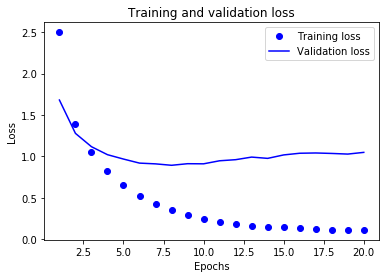

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

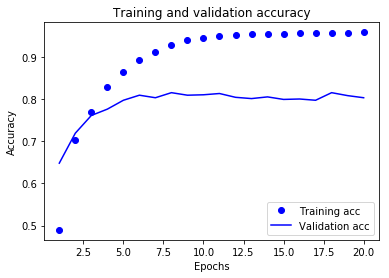

In [25]:
plt.clf()   # clear figure
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=8,
                   batch_size=512,
                   validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 131us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 89us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 91us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 90us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 92us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 1s 88us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 1s 90us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/8
224

In [27]:
results

[0.9844293263164463, 0.7836153161175423]

In [28]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19679430097951914

#### Generating predictions on new data

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

1.0000004

In [32]:
np.argmax(predictions[0])

3

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 127us/step - loss: 3.4021 - acc: 0.2959 - val_loss: 2.9755 - val_acc: 0.5710
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 2.6915 - acc: 0.5735 - val_loss: 2.4263 - val_acc: 0.5930
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 2.1771 - acc: 0.6045 - val_loss: 2.0529 - val_acc: 0.5920
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.8147 - acc: 0.6188 - val_loss: 1.7789 - val_acc: 0.6140
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.5728 - acc: 0.6278 - val_loss: 1.6205 - val_acc: 0.6240
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.4038 - acc: 0.6612 - val_loss: 1.5234 - val_acc: 0.6860
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.2762 - acc: 0.7184 - val_loss: 1.4582 - val_acc: 0.6860
Epoch 

In [35]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 130us/step - loss: 2.2326 - acc: 0.5570 - val_loss: 1.4157 - val_acc: 0.6920
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.1268 - acc: 0.7577 - val_loss: 1.1093 - val_acc: 0.7550
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.7927 - acc: 0.8325 - val_loss: 0.9844 - val_acc: 0.7980
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.5614 - acc: 0.8845 - val_loss: 0.9127 - val_acc: 0.8050
Epoch 5/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.4161 - acc: 0.9127 - val_loss: 0.9436 - val_acc: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.3185 - acc: 0.9328 - val_loss: 0.8559 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.2444 - acc: 0.9437 - val_loss: 0.9105 - val_acc: 0.8160
Epoch 

In [36]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 128us/step - loss: 2.8416 - acc: 0.5287 - val_loss: 1.9858 - val_acc: 0.6250
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.6520 - acc: 0.6798 - val_loss: 1.4847 - val_acc: 0.6770
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.2684 - acc: 0.7281 - val_loss: 1.2797 - val_acc: 0.7150
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.0507 - acc: 0.7729 - val_loss: 1.1728 - val_acc: 0.7510
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.8882 - acc: 0.8113 - val_loss: 1.0986 - val_acc: 0.7690
Epoch 6/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.7542 - acc: 0.8368 - val_loss: 1.0266 - val_acc: 0.7770
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6394 - acc: 0.8597 - val_loss: 0.9862 - val_acc: 0.7930
Epoch 

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 135us/step - loss: 2.6184 - acc: 0.4607 - val_loss: 1.7149 - val_acc: 0.6150
Epoch 2/20
7982/7982 [==============================] - 1s 92us/step - loss: 1.4662 - acc: 0.6833 - val_loss: 1.3544 - val_acc: 0.6880
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.1377 - acc: 0.7400 - val_loss: 1.2025 - val_acc: 0.7320
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8902 - acc: 0.8029 - val_loss: 1.0986 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.7241 - acc: 0.8365 - val_loss: 1.0327 - val_acc: 0.7750
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5602 - acc: 0.8730 - val_loss: 1.0594 - val_acc: 0.7650
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.4617 - acc: 0.8961 - val_loss: 1.0001 - val_acc: 0.7950
Epoch 

In [38]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 138us/step - loss: 2.7383 - acc: 0.4118 - val_loss: 1.8922 - val_acc: 0.5740
Epoch 2/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.6048 - acc: 0.6703 - val_loss: 1.4417 - val_acc: 0.6920
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.2453 - acc: 0.7286 - val_loss: 1.2748 - val_acc: 0.7120
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.0329 - acc: 0.7660 - val_loss: 1.1567 - val_acc: 0.7520
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.8632 - acc: 0.8079 - val_loss: 1.0974 - val_acc: 0.7540
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.7237 - acc: 0.8385 - val_loss: 1.0362 - val_acc: 0.7660
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6067 - acc: 0.8675 - val_loss: 1.0457 - val_acc: 0.7750
Epoch 

In [39]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 157us/step - loss: 2.7081 - acc: 0.4798 - val_loss: 1.7380 - val_acc: 0.6180
Epoch 2/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.5002 - acc: 0.6808 - val_loss: 1.3892 - val_acc: 0.6840
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.1868 - acc: 0.7316 - val_loss: 1.2276 - val_acc: 0.7110
Epoch 4/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.9873 - acc: 0.7615 - val_loss: 1.1299 - val_acc: 0.7400
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.8186 - acc: 0.8104 - val_loss: 1.0750 - val_acc: 0.7530
Epoch 6/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.6754 - acc: 0.8419 - val_loss: 1.0151 - val_acc: 0.7730
Epoch 7/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5563 - acc: 0.8662 - val_loss: 1.0491 - val_acc: 0.7570
Epoch 

In [41]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the network for 20 epochs
model.fit(partial_x_train,
       partial_y_train,
       epochs=15,
       batch_size=512,
       validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 137us/step - loss: 2.8648 - acc: 0.4618 - val_loss: 2.0413 - val_acc: 0.5790
Epoch 2/15
7982/7982 [==============================] - 1s 91us/step - loss: 1.6833 - acc: 0.6536 - val_loss: 1.5163 - val_acc: 0.6680
Epoch 3/15
7982/7982 [==============================] - 1s 91us/step - loss: 1.2838 - acc: 0.7234 - val_loss: 1.3009 - val_acc: 0.7180
Epoch 4/15
7982/7982 [==============================] - 1s 90us/step - loss: 1.0646 - acc: 0.7735 - val_loss: 1.1775 - val_acc: 0.7430
Epoch 5/15
7982/7982 [==============================] - 1s 88us/step - loss: 0.8975 - acc: 0.8047 - val_loss: 1.1153 - val_acc: 0.7550
Epoch 6/15
7982/7982 [==============================] - 1s 88us/step - loss: 0.7645 - acc: 0.8296 - val_loss: 1.0480 - val_acc: 0.7680
Epoch 7/15
7982/7982 [==============================] - 1s 89us/step - loss: 0.6511 - acc: 0.8520 - val_loss: 0.9869 - val_acc: 0.7980
Epoch 

[1.0602128011036005, 0.7840605521456854]